In [1]:
# ─── Step 1: Imports ─────────────────────────────────────────────────────────────

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate a dataset for ~2000 hours of transaction history
num_rows = 2000

dates = pd.date_range(start="2025-01-01", periods=num_rows, freq="H")

stores = np.random.choice(["Store_North","Store_East","Store_South","Store_West"], num_rows)

# Sales simulation (sales in £)
sales       = np.round(np.random.uniform(50, 1800, num_rows), 2)
transactions= np.random.randint(5, 140, num_rows)
avg_check   = np.round(sales / transactions, 2)

# Profit margin: typical UK coffee profit margin ~5–15%, avg ~12%.:contentReference[oaicite:3]{index=3}
profit_margin_pct = np.round(np.random.uniform(5,15,num_rows),2)
profit_per_hour   = np.round(sales * profit_margin_pct / 100, 2)

# Customer demographics (if available)
age_group = np.random.choice(["Under_25","25-40","40-60","Over_60"], num_rows)
gender    = np.random.choice(["Male","Female","Non-binary"], num_rows)

# Combine into DataFrame
df = pd.DataFrame({
    "DateTime": dates,
    "Store": stores,
    "Sales": sales,
    "Transactions": transactions,
    "Avg_Check": avg_check,
    "Profit": profit_per_hour,
    "Profit_Margin_Pct": profit_margin_pct,
    "Age_Group": age_group,
    "Gender": gender
})

df.head()

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_80965/2517157363.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start="2025-01-01", periods=num_rows, freq="H")


,DateTime,Store,Sales,Transactions,Avg_Check,Profit,Profit_Margin_Pct,Age_Group,Gender
0,2025-01-01 00:00:00,Store_South,373.98,119,3.14,24.76,6.62,40-60,Non-binary
1,2025-01-01 01:00:00,Store_West,998.33,61,16.37,146.36,14.66,25-40,Male
2,2025-01-01 02:00:00,Store_North,1577.66,76,20.76,111.38,7.06,Under_25,Male
3,2025-01-01 03:00:00,Store_South,1331.39,11,121.04,165.36,12.42,Over_60,Non-binary
4,2025-01-01 04:00:00,Store_South,1461.48,123,11.88,153.02,10.47,Under_25,Non-binary


In [3]:
# Total sales and profit statistics
df[["Sales","Profit"]].describe()

,Sales,Profit
count,2000.000000,2000.000000
mean,933.245100,93.275240
std,509.896204,59.555218
min,50.020000,3.420000
25%,494.247500,43.617500
50%,941.025000,86.155000
75%,1379.340000,131.235000
max,1798.970000,263.300000


In [4]:
store_summary = df.groupby("Store")[["Sales","Profit"]].sum().reset_index()
store_summary

,Store,Sales,Profit
0,Store_East,476641.56,47133.19
1,Store_North,484146.18,48203.01
2,Store_South,453085.12,44824.01
3,Store_West,452617.34,46390.27


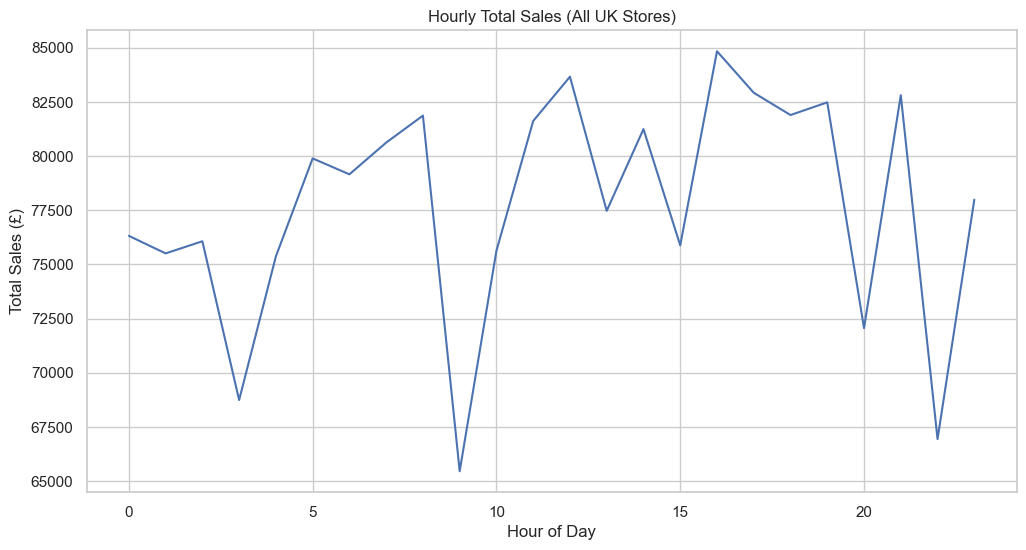

In [5]:
df["Hour"] = df["DateTime"].dt.hour

hourly_sales = df.groupby("Hour")["Sales"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Hour", y="Sales", data=hourly_sales)
plt.title("Hourly Total Sales (All UK Stores)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales (£)")
plt.show()

In [6]:
menu_items = np.random.choice(
    ["Coffee","Donut","Bagel","Sandwich","Tea","Cold Brew"],
    num_rows
)

df["Menu_Item"] = menu_items

menu_perf = df.groupby("Menu_Item")[["Sales","Profit"]].agg(["sum","mean"]).round(2)
menu_perf

Sales            Profit       
                 sum    mean       sum   mean
Menu_Item                                    
Bagel      289513.16  933.91  28815.37  92.95
Coffee     320271.01  982.43  32590.93  99.97
Cold Brew  324543.17  924.62  32563.72  92.77
Donut      307964.54  924.82  30269.35  90.90
Sandwich   326303.12  937.65  32909.78  94.57
Tea        297895.20  897.27  29401.33  88.56

In [7]:
# Simulate seats per store
df["Seats"] = np.random.choice([8,10,12,15], num_rows)
df["RevPASH"] = np.round(df["Sales"] / df["Seats"], 2)

revpash_summary = df.groupby("Store")["RevPASH"].mean().round(2)
revpash_summary

Store
Store_East     89.40
Store_North    85.22
Store_South    85.99
Store_West     88.09
Name: RevPASH, dtype: float64

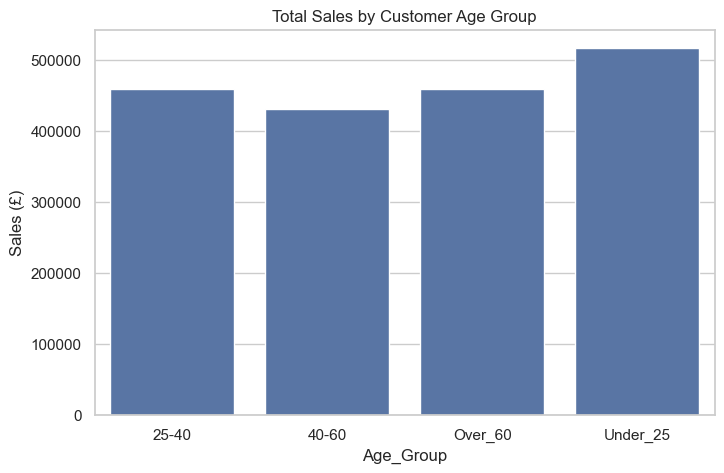

In [8]:
demographics_age = df.groupby("Age_Group")["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Age_Group", y="Sales", data=demographics_age)
plt.title("Total Sales by Customer Age Group")
plt.ylabel("Sales (£)")
plt.show()

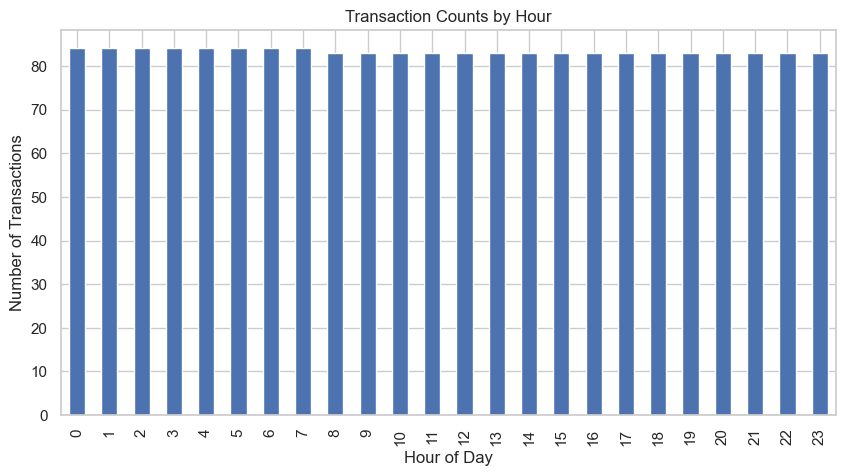

In [9]:
plt.figure(figsize=(10,5))
df["Hour"].value_counts().sort_index().plot(kind="bar")
plt.title("Transaction Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()